In [55]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [3]:
# read the data
df = pd.read_excel('Data.xls')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Data Description

There is a total of 23 diverse features and 1 target variable. The description of features is given below:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_0 - PAY_6: History of past payments.
The past monthly payment records (from April to September 2005)
The measurement scale for the repayment status is:
    -1 = pay duly; 
    1 = payment delay for one month; 
    2 = payment delay for two months; ...; 
    8 = payment delay for eight months; 
    9 = payment delay for nine months and above.

BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar).

PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar).

In [4]:
# get the info oof all columns like datatype and column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
# describe the statistical aspects of dataframe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# check the number of null columns in dataframe
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

### Exploratory Data Analysis

In [7]:
# copy the data frame in to a new one
df_new = df

In [8]:
# number of unique values in each column of data
df_new.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Y                2
dtype: int64

EDUCATION >> This column should have 4 unique values (1,2,3,4) but here there are total 7 unique values that means it doesn't have direct null values but has dummy or wrong values instead of proper categories.

MARRIAGE >> This column should have 3 unique values (1,2,3) but has 4 unique values that means it has some dummy values which needs to be handled

PAY_0 - PAY_6 >> These columns should have 10 unique values (-1, 1 to 9) but has 11 unique values.

In [9]:
df_new['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, 5,6,0 are those dummy variables which are not properly defined. We can assign them into 'Others' category.

In [10]:
# replacing values for Education column
df_new['EDUCATION'].replace([1, 2, 3, 4, 5, 6, 0],
                        ['Graduate School', 'University', 'High School', 'Others', 'Others', 'Others', 'Others'], inplace=True)
print(df_new)
print('--------------------------------------------')
df_new['EDUCATION'].value_counts()

          ID  LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2   University         1   24      2      2     -1   
1          2     120000    2   University         2   26     -1      2      0   
2          3      90000    2   University         2   34      0      0      0   
3          4      50000    2   University         1   37      0      0      0   
4          5      50000    1   University         1   57     -1      0     -1   
...      ...        ...  ...          ...       ...  ...    ...    ...    ...   
29995  29996     220000    1  High School         1   39      0      0      0   
29996  29997     150000    1  High School         2   43     -1     -1     -1   
29997  29998      30000    1   University         2   37      4      3      2   
29998  29999      80000    1  High School         1   41      1     -1      0   
29999  30000      50000    1   University         1   46      0      0      0   

       PAY_4  ...  BILL_AMT

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64

In [11]:
# check the value count of unique values in column
df_new['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
# Here, 0 value is the dummy value and not perfectly entered in any category so we need to add that to 'Others' category
# replacing values for marriage column
df_new['MARRIAGE'].replace([1, 2, 3, 0],
                        ['Married', 'Single', 'Others', 'Others'], inplace=True)
print(df_new)
print('--------------------------------------------')
df_new['MARRIAGE'].value_counts()

          ID  LIMIT_BAL  SEX    EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2   University  Married   24      2      2     -1   
1          2     120000    2   University   Single   26     -1      2      0   
2          3      90000    2   University   Single   34      0      0      0   
3          4      50000    2   University  Married   37      0      0      0   
4          5      50000    1   University  Married   57     -1      0     -1   
...      ...        ...  ...          ...      ...  ...    ...    ...    ...   
29995  29996     220000    1  High School  Married   39      0      0      0   
29996  29997     150000    1  High School   Single   43     -1     -1     -1   
29997  29998      30000    1   University   Single   37      4      3      2   
29998  29999      80000    1  High School  Married   41      1     -1      0   
29999  30000      50000    1   University  Married   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [13]:
print(df_new['PAY_0'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_2'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_3'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_4'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_5'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_6'].value_counts())
print('--------------------------------------------')

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
--------------------------------------------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
--------------------------------------------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
--------------------------------------------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
--------------------------------------------
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------------------------------------------

Here, -2 and 0 both are creating redutant information as they are not perfectly categorized. To handle this scenario, we have considered -2 and 0 into the the -1 category.

In [14]:
# update the columns PAY_0 to PAY_6
df_new.loc[(df_new.PAY_0 == -2)  | (df_new.PAY_0 == 0), 'PAY_0'] = -1
df_new.loc[(df_new.PAY_2 == -2)  | (df_new.PAY_2 == 0), 'PAY_2'] = -1
df_new.loc[(df_new.PAY_3 == -2)  | (df_new.PAY_3 == 0), 'PAY_3'] = -1
df_new.loc[(df_new.PAY_4 == -2)  | (df_new.PAY_4 == 0), 'PAY_4'] = -1
df_new.loc[(df_new.PAY_5 == -2)  | (df_new.PAY_5 == 0), 'PAY_5'] = -1
df_new.loc[(df_new.PAY_6 == -2)  | (df_new.PAY_6 == 0), 'PAY_6'] = -1

In [15]:
# update the categorical column sex
df_new['SEX'] = df['SEX'].apply(lambda x: 'Male' if x==1 else 'Female')
df_new

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,Married,41,1,-1,-1,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
df_new['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

In [17]:
# replacing values for Education column
df_new['Y'].replace([0,1], ['No', 'Yes'], inplace=True)
df_new

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,No
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,No
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Yes
29998,29999,80000,Male,High School,Married,41,1,-1,-1,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Yes


#### Categorical Columns

In [68]:
color = ['#FFB8BF', '#3CDFFF']


Text(0.5, 1.0, 'Default payment set for Next Month')

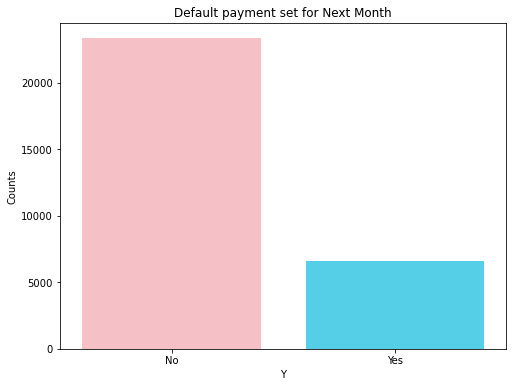

In [69]:
# plot the graph to check distribution of target variable
df_1 = df_new.groupby('Y').size().reset_index(name = 'Counts')
df_1
plt.figure(figsize=(8,6))
sns.barplot(x ='Y', y ='Counts', data = df_1, palette = color)
plt.title('Default payment set for Next Month')

Therefore, we can say that the data is imbalanced and majority of the data has value which has default payment status as '0' (Not set the default payment)

In [72]:
# create a grouped data frames of different categorical features like SEX, MARRIAGE, EDUCATION

df_2 = df_new.groupby(['SEX', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_2)
print('-------------------------------------------------------')
df_3 =df_new.groupby(['MARRIAGE', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_3)
print('-------------------------------------------------------')
df_4 =df_new.groupby(['EDUCATION', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_4)

      SEX    Y  count
0  Female   No  14349
1  Female  Yes   3763
2    Male   No   9015
3    Male  Yes   2873
-------------------------------------------------------
  MARRIAGE    Y  count
0  Married   No  10453
1  Married  Yes   3206
2   Others   No    288
3   Others  Yes     89
4   Single   No  12623
5   Single  Yes   3341
-------------------------------------------------------
         EDUCATION    Y  count
0  Graduate School   No   8549
1  Graduate School  Yes   2036
2      High School   No   3680
3      High School  Yes   1237
4           Others   No    435
5           Others  Yes     33
6       University   No  10700
7       University  Yes   3330


<AxesSubplot:xlabel='EDUCATION'>

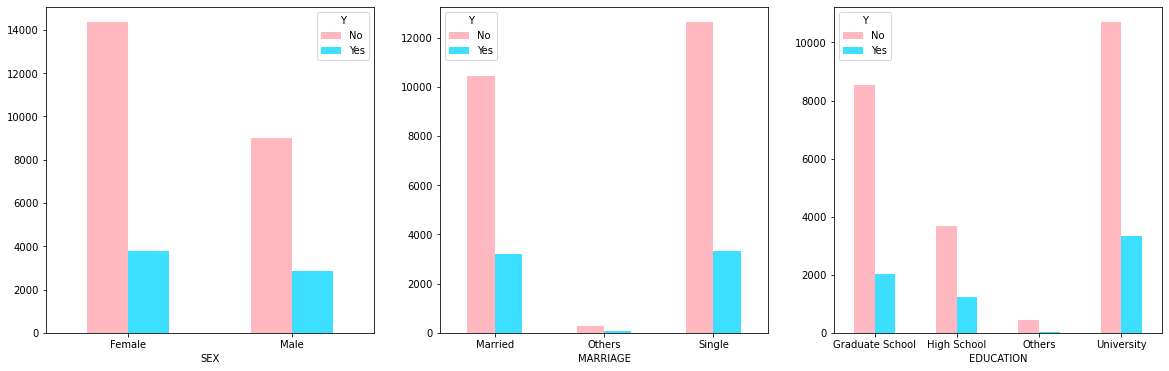

In [71]:
# plots of Different categorical features such as SEX, EDUCATION, MARRIAGE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
df_g1 =df_2.pivot_table(index = ['SEX'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'bar', rot=0, ax=ax1, color = color)

df_g2 = df_3.pivot_table(index = ['MARRIAGE'], columns = 'Y', values = 'count', aggfunc= 'first')
df_g2.plot(kind = 'bar', rot=0, ax=ax2, color = color)

df_g3 = df_4.pivot_table(index = ['EDUCATION'], columns = 'Y', values = 'count', aggfunc= 'first')
df_g3.plot(kind = 'bar', rot=0, ax=ax3, color = color)